<a href="https://colab.research.google.com/github/lauxpaux/HousingMarketPredictor/blob/main/property_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import plotly as px

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Real_Estate_Sales_2001-2021_GL.csv')

In [3]:
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
2,210317,2021,07/05/2022,Avon,53 COTSWOLD WAY,329730.0,805000.0,0.4096,Residential,Single Family,NaN,NaN,NaN,POINT (-72.846365959 41.781677018)
3,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN
4,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.6958,Residential,Single Family,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054159 entries, 0 to 1054158
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial Number     1054159 non-null  int64  
 1   List Year         1054159 non-null  int64  
 2   Date Recorded     1054157 non-null  object 
 3   Town              1054159 non-null  object 
 4   Address           1054108 non-null  object 
 5   Assessed Value    1054159 non-null  float64
 6   Sale Amount       1054159 non-null  float64
 7   Sales Ratio       1054159 non-null  float64
 8   Property Type     671713 non-null   object 
 9   Residential Type  660275 non-null   object 
 10  Non Use Code      302242 non-null   object 
 11  Assessor Remarks  161472 non-null   object 
 12  OPM remarks       11564 non-null    object 
 13  Location          254643 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 112.6+ MB


In [5]:
df.describe()

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio
count,1.054159e+06,1.054159e+06,1.054159e+06,1.054159e+06,1.054159e+06
mean,5.027140e+05,2.010774e+03,2.797416e+05,3.990286e+05,9.953241e+00
std,7.230239e+06,6.540711e+00,1.650117e+06,5.229758e+06,1.838434e+03
min,0.000000e+00,2.001000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.055200e+04,2.004000e+03,8.845000e+04,1.422000e+05,4.816008e-01
50%,8.008000e+04,2.011000e+03,1.395800e+05,2.300000e+05,6.162887e-01
75%,1.608155e+05,2.017000e+03,2.270000e+05,3.700000e+05,7.764000e-01
max,2.000500e+09,2.021000e+03,8.815100e+08,5.000000e+09,1.226420e+06


Determining the ratio of nulls in the data frame for each column. The columns 'OPM remarks', 'Assessor Remarks', 'Location', and 'Non Use Code' are missing over 70% of the entries. These columns will be dropped.

In [6]:
df.isna().sum()/len(df.index) * 100

Serial Number        0.000000
List Year            0.000000
Date Recorded        0.000190
Town                 0.000000
Address              0.004838
Assessed Value       0.000000
Sale Amount          0.000000
Sales Ratio          0.000000
Property Type       36.279726
Residential Type    37.364762
Non Use Code        71.328614
Assessor Remarks    84.682387
OPM remarks         98.903012
Location            75.843967
dtype: float64

In [7]:
df.drop(['OPM remarks', 'Location', 'Assessor Remarks', 'Non Use Code'], axis=1, inplace=True)

In [8]:
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family
2,210317,2021,07/05/2022,Avon,53 COTSWOLD WAY,329730.0,805000.0,0.4096,Residential,Single Family
3,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo
4,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.6958,Residential,Single Family


In [9]:
df['sold_date'] = pd.to_datetime(df['Date Recorded'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054159 entries, 0 to 1054158
Data columns (total 11 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Serial Number     1054159 non-null  int64         
 1   List Year         1054159 non-null  int64         
 2   Date Recorded     1054157 non-null  object        
 3   Town              1054159 non-null  object        
 4   Address           1054108 non-null  object        
 5   Assessed Value    1054159 non-null  float64       
 6   Sale Amount       1054159 non-null  float64       
 7   Sales Ratio       1054159 non-null  float64       
 8   Property Type     671713 non-null   object        
 9   Residential Type  660275 non-null   object        
 10  sold_date         1054157 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 88.5+ MB


In [11]:
df.set_index('sold_date', inplace=True)
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
sold_date,,,,,,,,,,
2021-09-13,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN
2020-10-02,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family
2022-07-05,210317,2021,07/05/2022,Avon,53 COTSWOLD WAY,329730.0,805000.0,0.4096,Residential,Single Family
2021-03-09,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo
2021-04-13,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.6958,Residential,Single Family


In [12]:
df.sort_index(inplace=True)
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
sold_date,,,,,,,,,,
1999-04-05,170177,2017,04/05/1999,New London,184 PEQUOT AVE 309,46690.0,95000.0,0.491400,Condo,Condo
2001-08-01,173165,2017,08/01/2001,Shelton,19 BLACKBERRY LA,390810.0,635000.0,0.615449,Single Family,Single Family
2001-08-23,173202,2017,08/23/2001,Shelton,12 BOYSENBERRY LA,427910.0,558000.0,0.766864,Single Family,Single Family
2001-09-04,60626,2006,09/04/2001,Newington,110 MOYLAN CT,64750.0,88000.0,0.735795,Condo,Condo
2001-09-05,60631,2006,09/05/2001,Newington,48 EVERGREEN RD,166110.0,256000.0,0.648867,Single Family,Single Family


Splitting our data between Train/Test sets.

In [13]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=3)

In [14]:
X = df.drop(labels=['Sale Amount'], axis=1)
y = df['Sale Amount']

In [16]:
for train_index, test_index in tss.split(X):
  X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [17]:
X_train.index

DatetimeIndex(['1999-04-05', '2001-08-01', '2001-08-23', '2001-09-04',
               '2001-09-05', '2001-09-25', '2001-10-01', '2001-10-01',
               '2001-10-01', '2001-10-01',
               ...
               '2018-02-14', '2018-02-14', '2018-02-14', '2018-02-14',
               '2018-02-14', '2018-02-14', '2018-02-14', '2018-02-14',
               '2018-02-14', '2018-02-14'],
              dtype='datetime64[ns]', name='sold_date', length=790620, freq=None)

In [18]:
X_test.index

DatetimeIndex(['2018-02-14', '2018-02-14', '2018-02-14', '2018-02-14',
               '2018-02-14', '2018-02-14', '2018-02-14', '2018-02-14',
               '2018-02-14', '2018-02-14',
               ...
               '2022-09-30', '2022-09-30', '2022-09-30', '2022-09-30',
               '2022-09-30', '2022-09-30', '2022-09-30', '2022-09-30',
                      'NaT',        'NaT'],
              dtype='datetime64[ns]', name='sold_date', length=263539, freq=None)

Next: Perform EDA on X_train data:

In [10]:
df['Property Type'].unique()

array(['Commercial', 'Residential', 'Vacant Land', nan, 'Apartments',
       'Industrial', 'Public Utility', 'Condo', 'Two Family',
       'Three Family', 'Single Family', 'Four Family'], dtype=object)

In [11]:
def plot_unique_vals(data, col, title, x_label, y_label):
    '''
    Plots the unique values of each column.
    Takes in data, col, title, x_label, and y_label as variables:

    Inputs:
    data = dataframe
    col = column in the dataframe of interest
    title = title of the plot
    x_label = x axis label of the plot
    y_label = y axis label of the plot

    Outputs:
    A bar plot of the unique values in column

    '''
    fig = sns.barplot(data[col].value_counts(), orient='h').set_title(title)
    # add additional title, xlabel and ylabel variables

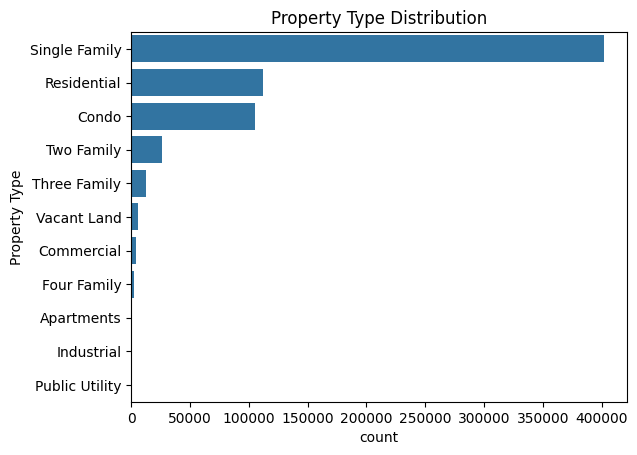

In [12]:
plot_unique_vals(df, 'Property Type', 'Property Type Distribution', 'Property Type', 'Count')

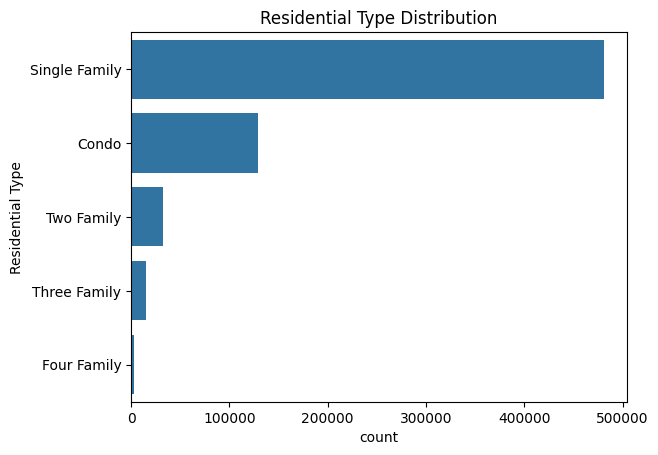

In [13]:
plot_unique_vals(df, 'Residential Type', 'Residential Type Distribution', 'Residential Type', 'Count');

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054159 entries, 0 to 1054158
Data columns (total 10 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial Number     1054159 non-null  int64  
 1   List Year         1054159 non-null  int64  
 2   Date Recorded     1054157 non-null  object 
 3   Town              1054159 non-null  object 
 4   Address           1054108 non-null  object 
 5   Assessed Value    1054159 non-null  float64
 6   Sale Amount       1054159 non-null  float64
 7   Sales Ratio       1054159 non-null  float64
 8   Property Type     671713 non-null   object 
 9   Residential Type  660275 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 80.4+ MB


Let's check for duplicate entries:

In [15]:
df.duplicated().sum()

0

In [ ]:
sns.histplot(df)